# Imports

In [1]:
from WordleBot import WordleBot

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Basic usage

In [3]:
bot = WordleBot()
bot.set_wordle(bot.wordles[209])
#bot.pick_wordle(209) # equivalent to above
#bot.set_todays_wordle()
#bot.set_wordle('kiosk')

while not bot.solved:
    bot.filter_possible_words()
    guess = bot.make_random_guess()
    bot.check_guess(guess)

bot.print_colours()

⬛🟨⬛🟨⬛
🟩⬛🟩⬛🟨
🟩🟩🟩🟨⬛
🟩🟩🟩⬛🟩
🟩🟩🟩🟩🟩


or, for the basic setup of picking today's wordle and solving it with the very basic strategy above:

In [4]:
bot = WordleBot()
bot.solve() # solve() will set today's wordle if you neglected to set it already

🟨🟩⬛⬛⬛
⬛🟩🟨🟩🟩
⬛🟩🟩🟩🟩
🟩🟩🟩🟩🟩


# Script for testing out strategies

Success rate: 82.70%


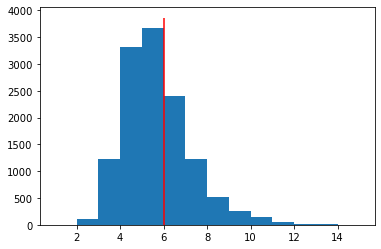

In [5]:
num_of_guesses_to_get_answer = []

n = len(bot.dictionary)
i = 0
for wordle in bot.dictionary:
    i += 1
    print('\r{}/{}'.format(i,n),end='')
    
    bot = WordleBot()
    bot.set_wordle(wordle)
    
    ### PUT YOUR STRATEGY HERE ###
    while not bot.solved:
        bot.filter_possible_words()
        guess = bot.make_random_guess()
        bot.check_guess(guess)
    ### PUT YOUR STRATEGY HERE ###
    
    num_of_guesses_to_get_answer.append(bot.num_of_guesses)

success_rate = (np.array(num_of_guesses_to_get_answer)<7).sum()/n*100
print('\rSuccess rate: {:.2f}%'.format(success_rate))
plt.hist(num_of_guesses_to_get_answer,bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.vlines(6,0,plt.ylim()[1],colors='r')
plt.show()